<a href="https://colab.research.google.com/github/dan9133/Python_House_Prediction/blob/main/California_Dataset_House_price_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this project, we conduct an exploratory data analysis (EDA) of the California dataset**.
**The dataset contains a diverse range of information, including demographic details, economic indicators, and geographical coordinates of various regions in California**.

**Nominal features like 'County Name' and 'City' provide information about the geographical locations of the regions.**

**Ordinal features such as 'Education Level' give insights into the education attainment levels of the population.**

**iscrete features like 'Population' and 'Number of Households' provide information about the sizes and density of different areas.**

**Continuous features such as 'Median Income' and 'Average Family Size' offer insights into the economic and demographic characteristics of the regions.**

**Through EDA, we aim to uncover potential relationships between these features. For instance, we might investigate whether regions with higher median incomes tend to have a higher average family size.**

**Nominal Features: These are categorical variables that do not have a specific order or ranking. Examples include 'County Name' and 'City'**.

**Ordinal Features: These categorical variables have a meaningful order or ranking. For instance, a feature like 'Education Level' could have categories like 'High School', 'Bachelor's Degree', 'Master's Degree', etc.**

**Discrete Features: These are numerical variables that have distinct, separate values. Examples include 'Population' and 'Number of Households'**.

**Continuous Features: These are numerical variables that can take any value within a range. Attributes like 'Median Income' and 'Average Family Size' are continuous features**

In [ ]:
#Importing Data data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Load the data set in  pandas dataframe.
california_data=pd.read_excel("/content/housing (3).xlsx")

In [ ]:
# display the top 5 record
california_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# display the bottom five record
california_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [ ]:
# Info   all the  data type wheter float/int/str.object
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
# describe the data
california_data.describe()
# describe means to find the min,max 75% and 25  % of the vlaue in white whisker plot  data set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# display the null values in data set
california_data.isnull().sum()
# only show the  207 null vlaue in total bedroom column in  data set

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# chech the dataset shape
california_data.shape
# That present Row=20640 and their column are 10

(20640, 10)

In [ ]:
#1  Calculate Average Median Income
average_median_income = california_data['median_income']
average_median_income.mean()



3.8706710029069766

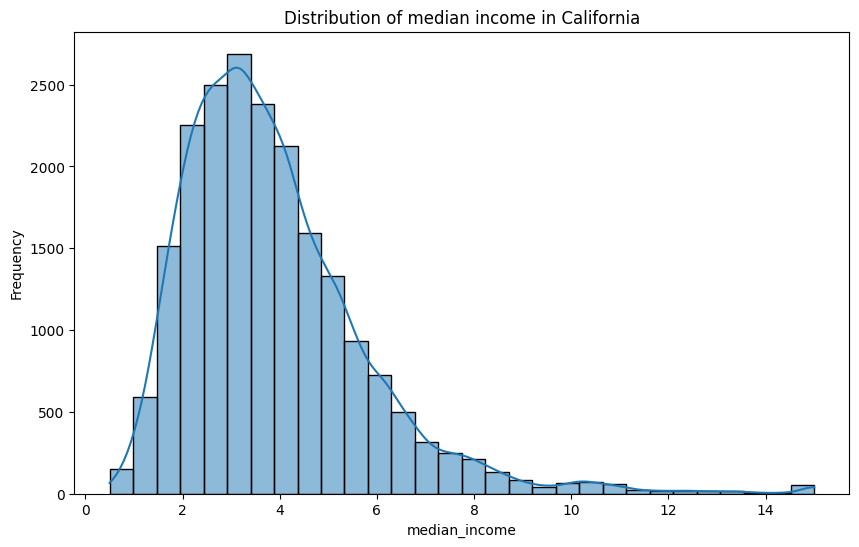

In [ ]:
# Create a histogram to visualize the distribution of median incomes
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=california_data, x='median_income', bins=30, kde=True)
plt.title('Distribution of median income in California')
plt.xlabel('median_income')
plt.ylabel('Frequency')
plt.show()


**X-axis (Median Income): This axis represents the range of median incomes. The range is divided into intervals called bins, and each bin corresponds to a range of median income values**.

**Y-axis (Frequency): This axis represents the frequency or count of data points falling within each bin's range.**

**Bars: The height of each bar represents the number of data points that have median incomes falling within the corresponding bin's range.**

**Kernel Density Estimate (KDE): The KDE curve is an estimate of the probability density function of the data. It provides a smoothed representation of the distribution.**

**# 2 Draw an appropriate plot to see the distribution of housing_median_age and explain your observations**

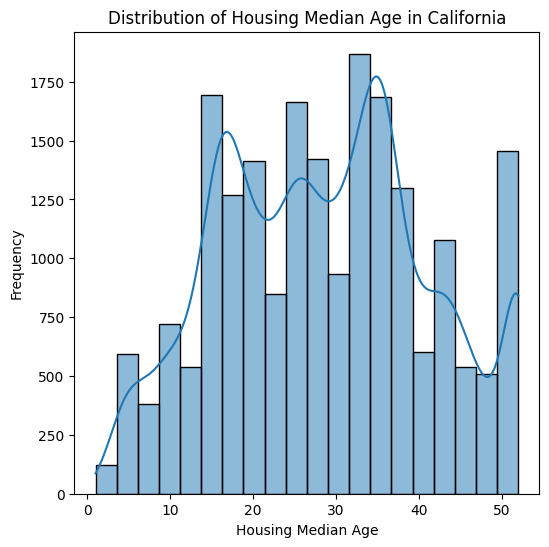

In [ ]:
# Create a distribution plot for housing_median_age
plt.figure(figsize=(6, 6))
sns.histplot(data=california_data, x='housing_median_age', bins=20, kde=True)
plt.title('Distribution of Housing Median Age in California')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

**The histogram shows how housing median ages are distributed. There are peaks around newer (5-15 years) and older (30-40 years) housing units. Overall, housing ages are fairly evenly spread.**

**3 Show with the help of visualization, how median_income and median_house_values are related?**

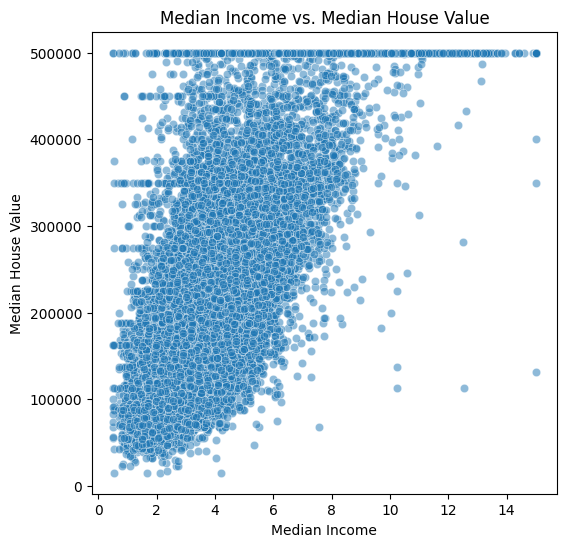

In [ ]:
# Create a scatter plot to show the relationship
plt.figure(figsize=(6, 6))
sns.scatterplot(data=california_data, x='median_income', y='median_house_value', alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

**The scatter plot reveals a generally positive trend between 'median_income' and 'median_house_value'. As 'median_income' increases, 'median_house_value' tends to increase as well. Clusters of points along the diagonal line suggest regions where higher median incomes are associated with higher median house values. However, there's also variability, indicating that other factors contribute to house values.**

**Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.**

In [ ]:
# display the  null vlaues
california_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
california_data[california_data["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


**# 5 Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set**

In [ ]:
# Calculate the mean of 'total_bedrooms'
mean_total_bedrooms = california_data['total_bedrooms'].mean()

# Fill missing 'total_bedrooms' with the mean value
filled_data = california_data.fillna({'total_bedrooms': mean_total_bedrooms})

# Save the filled dataset to a new CSV file
filled_data.to_csv('filled_california_dataset.csv', index=False)

# Display the first few rows of the filled dataset
print(filled_data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


**The new dataset, saved as 'filled_california_dataset.csv', has missing values in the 'total_bedrooms' column replaced with the mean value of that column. This approach helps maintain data integrity while handling missing values. The print(filled_data.head()) line displays the first few rows of the filled dataset to show how the filled values look in the new dataset**

**Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.**

In [ ]:
california_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# User-defined function to calculate median
def calculate_median(data_column):
    median_value = data_column.median()
    return median_value

# Calculate median for 'total_bedrooms'
median_total_bedrooms = calculate_median(california_data['total_bedrooms'])

print("Median Total Bedrooms:", median_total_bedrooms)

Median Total Bedrooms: 435.0


**The user-defined function calculate_median calculates the median value of a given data column. In this example, we used it to calculate the median of 'total_bedrooms'. Calculating the median helps us understand the middle point of the data distribution, making it a robust measure for central tendency that is less sensitive to outliers. The displayed median value gives us insight into the central tendency of the 'total_bedrooms' data.**

**# 7 Plot latitude versus longitude and explain your observations.**

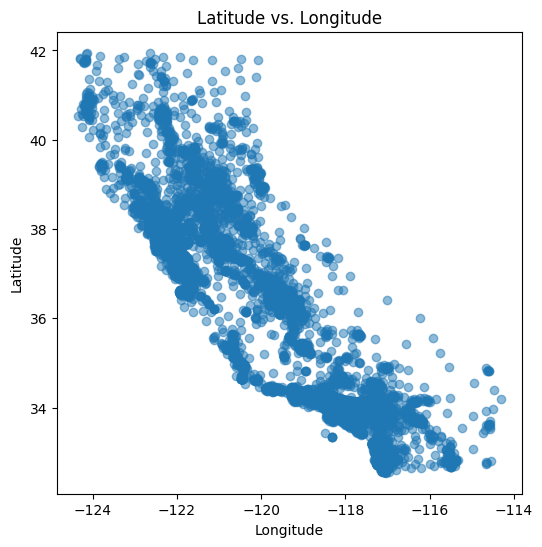

In [ ]:
# Plot latitude versus longitude
plt.figure(figsize=(6, 6))
plt.scatter(california_data['longitude'], california_data['latitude'], alpha=0.5)
plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()








**X-axis (Longitude): Represents the east-west location on the map**.

**Y-axis (Latitude): Represents the north-south location on the map**.

**Points: Each point on the plot represents a region's geographical coordinates (latitude and longitude)**.

**Observation:**
**The plot shows the spatial distribution of data points across California. You can observe patterns, clusters, and any possible trends in the distribution of regions based on their latitude and longitude. It helps visualize how the dataset is distributed geographically**

**# 8 Create a data set for which the ocean_proximity is ‘Near ocean’**

In [ ]:

# Create a new dataset for 'Near ocean' ocean_proximity
near_ocean_data = california_data[california_data['ocean_proximity'] == 'NEAR OCEAN']

# Display all data values for 'Near ocean'
# with pd.option_context('display.max_columns', None, 'display.max_rows', None):
#     print(near_ocean_data)
with pd.option_context('display.max_columns', None):
    print(near_ocean_data)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1850     -124.17     41.80                  16         2739           480.0   
1851     -124.30     41.80                  19         2672           552.0   
1852     -124.23     41.75                  11         3159           616.0   
1853     -124.21     41.77                  17         3461           722.0   
1854     -124.19     41.78                  15         3140           714.0   
...          ...       ...                 ...          ...             ...   
20380    -118.83     34.14                  16         1316           194.0   
20381    -118.83     34.14                  16         1956           312.0   
20423    -119.00     34.08                  17         1822           438.0   
20424    -118.75     34.18                   4        16704          2704.0   
20425    -118.75     34.17                  18         6217           858.0   

       population  households  median_income  media

**displaying all the columns for these regions, you can thoroughly examine the characteristics and attributes of the data points in these coastal regions. This allows you to gain insights into various aspects such as housing, demographics, and more specific to the 'Near ocean' areas in the dataset.**

**Find the mean and median of the median income for the data set created in question 8**

In [ ]:
california_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Calculate the mean and median of 'median_income'
mean_median_income = near_ocean_data['median_income'].mean()
median_median_income = near_ocean_data['median_income'].median()

print("Mean Median Income:", mean_median_income)
print("Median Median Income:", median_median_income)


Mean Median Income: 4.0057848006019565
Median Median Income: 3.64705


**# 10 Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large**

In [ ]:
# Create a new column 'total_bedroom_size' based on conditions
california_data['total_bedroom_size'] = pd.cut(
    california_data['total_bedrooms'],
    bins=[-1, 10, 1000],
    labels=['small', 'medium'],
    right=True
)

# Display the updated dataset with the new column
print(california_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
1        2401        1138         8.3014              358500        NEAR BAY   
2         496         177         7.2574              352100        NEAR BAY   
3         558         219         5.6431              341300        NEAR BAY   
4         565         259         3.8462              342200        NEAR BAY   

  total_bedroom_size  
0             medium  
1                NaN  